<img src="http://charlestay.com/Animation5.gif" width=100% title="A Header Image That We Have Designed & Added Using HTML">

<A HREF="https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/"><button>View Challenge on Driven Data</button></a>

## Contents <a id='C'></a>

<a href='#S1'><b>Step 1 - Preparing Libraries & Dataset</b></a>
<p style="margin-left: 20px">
    <a href='#IL'>Importing Libraries</a></br>
    <a href='#ID'>Importing Dataset</a></br>
</p>

<a href='#S2'><b>Step 2 - Data Exploration</b></a>
<p style="margin-left: 20px">
    <a href='#AD'>Analyzing Our Data</a></br>
    <a href='#VD'>Visualizing Our Data</a></br>
</p>

<a href='#S3'><b>Step 3 - Data Preparation</b></a>
<p style="margin-left: 20px">
    <a href='#FS'>Feature Selection</a></br>
    <a href='#FE'>Feature Engineer</a></br>
</p>

<a href='#S4'><b>Step 4 - Classification Models / ML Algorithms</b></a>
<p style="margin-left: 20px">
    <a href='#KNN'>K-Nearest Neigbors (KNN)</a></br>
    <a href='#LR'>Logistic Regression</a></br>
    <a href='#GB'>Gradient Boosting</a></br>
    <a href='#SVM'>Support Vector Machine (SVM)</a></br>
    <a href='#DT'>Decision Tree</a></br>
    <a href='#RF'>Random Forest</a></br>
    <a href='#NB'>Naive Bayes</a></br>
</p>

<a href='#S5'><b>Step 5 - Evaluation</b></a>

## Step 1 - Preparing Libraries & Dataset <a id='S1'></a></br><a href='#C'><font size=2><i>(Back to Contents) ↑</i></font></a>
### <u>Importing Libraries</u> <a id='IL'></a>
#### Import helpful libraries & give quick names to those libraries

In [210]:
# Linear algebra
import pandas as pd 
## Data processing
import numpy as np 

# Visualization tools
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
## Animation library
import matplotlib.animation as animation

# Data splitting & parameter tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier

# Feature selection
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

# Evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score

# Further processing
from sklearn.preprocessing import StandardScaler

### <u>Importing Dataset</u> <a id='ID'></a>
#### The raw data from drivendata.org is in .dat file format. Rather than converting it to csv using Excel, we have decided to prep the .dat data file entirely using python.
To do so, we import the file using Panda's read_csv function and separate each column with a space delimiter. Since the original .dat file does not contain any column headings, we assigned them manually and have included markups of what they are, how they are interpreted, as well as possible values to expect.

In [211]:
# Import the dataset and add headings to each column
data = pd.read_csv('heart.dat', sep=' ', names = [
        'age', ## age in years
        'sex', ## 1 = male; 0 = female
        'chest_pain_type', ## Chest pain type
        'blood_pressure', ## resting blood pressure in mm Hg on admission to the hospital
        'chol', ## serum cholestoral in mg/dl
        'blood_sugar', ## fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
        'rest_ecg', ## resting electrocardiographic results
        'max_heart_rate', ## maximum heart rate achieved
        'exercise_induced_angina', ## 1 = yes; 0 = no
        'st_depression', ## ST depression induced by exercise relative to rest
        'st_slope', ## slope of the peak exercise ST segment
        'num_major_vessels', ## number of major vessels (0-3) colored by flourosopy
        'thalassemia', ## 3 = normal; 6 = fixed defect; 7 = reversable defect
        'target']) ## target which is our label (1 = heart disease absent or 2 = present)

# Show the first 2 lines to verify that we have imported the dataset correctly 
data.head(2)

,age,sex,chest_pain_type,blood_pressure,chol,blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1


In [212]:
# Show the last 2 lines just to be sure!
data.tail(2)

,age,sex,chest_pain_type,blood_pressure,chol,blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1
269,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2


## Step 2 - Data Exploration <a id='S2'></a></br><a href='#C'><font size=2><i>(Back to Contents) ↑</i></font></a>
### <u>Analyzing our Data</u> <a id='AD'></a>

In [213]:
# Summary Statistics of the dataset

## Count - the number of non-empty rows in a column.
## Mean - the mean value of that column.
## Std - the Standard Deviation Value of that column.
## Min - the minimum value.
## 25%, 50%, and 75% - the percentile/quartile for each column.
## Max - the maximum value.
data.describe()

,age,sex,chest_pain_type,blood_pressure,chol,blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


#### At First Glance...
We can do some preliminary digging into the data here.  
- One attribute that might be of interest but not present is weight (or BMI). This would be a good attribute to perform some analysis on.
- By looking at the mean of our target value (1.44) we can see that less than half of the people in the dataset have heart disease.
- Another data point that stands out is the age category. Age has a very high standard deviation (9).
- We can see that there is a wide variety of ages spanning from 29 to 77.
- Age is a data point we may want to look into dropping from the population if the younger ages begin to skew our data.

In [214]:
# Determining number of rows and columns in the dataset
print('Number of rows in the dataset: ',data.shape[0])
print('Number of columns in the dataset: ',data.shape[1])

Number of rows in the dataset:  270
Number of columns in the dataset:  14


In [215]:
# The following step describes our data a little bit more in depth, showing us the type of data in each column and if we have missing values
## Alternatively, we could use a combination of data.dtypes and data.isnull().sum() or heart.isnull().values.any() to perform the same task
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age                        270 non-null float64
sex                        270 non-null float64
chest_pain_type            270 non-null float64
blood_pressure             270 non-null float64
chol                       270 non-null float64
blood_sugar                270 non-null float64
rest_ecg                   270 non-null float64
max_heart_rate             270 non-null float64
exercise_induced_angina    270 non-null float64
st_depression              270 non-null float64
st_slope                   270 non-null float64
num_major_vessels          270 non-null float64
thalassemia                270 non-null float64
target                     270 non-null int64
dtypes: float64(13), int64(1)
memory usage: 29.6 KB


#### To get an overview of the dataset (eg. range, mean), we generated a chart with 14 histograms (one for each variable/column):

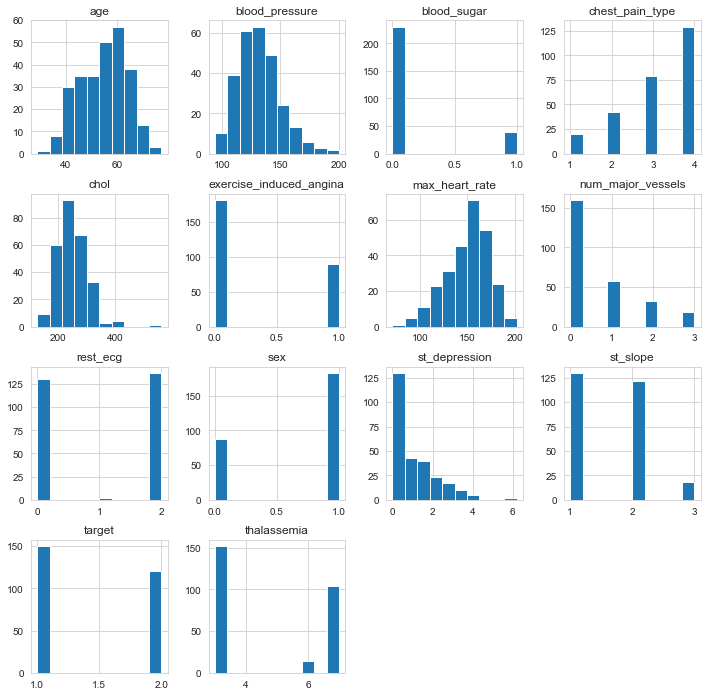

In [216]:
# Plotting histogram for each variable (and we define the size we want the visualization to be)
data.hist(figsize = (12, 12))
plt.show()

#### A Correlation Matrix is also a great way to explore and understand data relationships!

In [217]:
# Generating a correlation matrix that indicates what variables in the dataset are more highly correlated with heart disease 
data.corr()

,age,sex,chest_pain_type,blood_pressure,chol,blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
chest_pain_type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
blood_pressure,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
chol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
blood_sugar,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
rest_ecg,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
max_heart_rate,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
exercise_induced_angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
st_depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


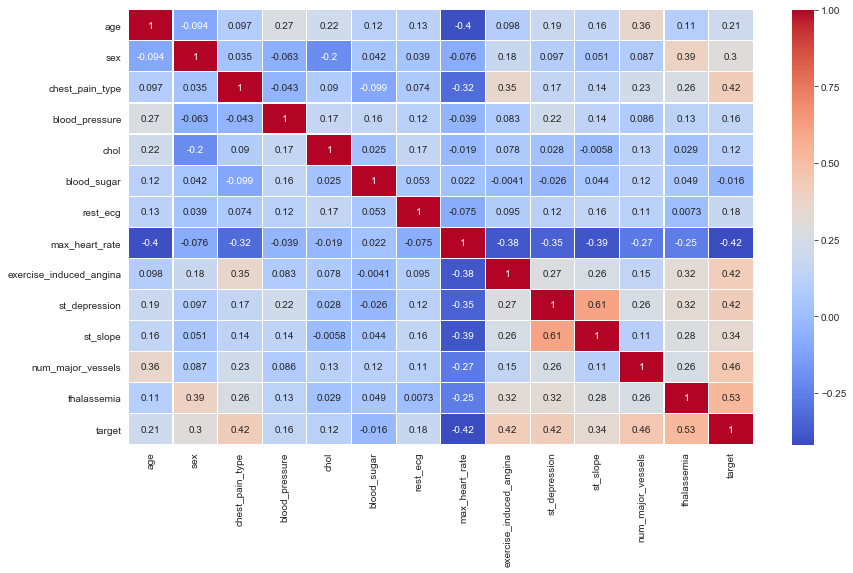

In [218]:
# We can also visualize the correlation matrix on a heatmap from the seaborn library
sns.set_style('whitegrid')
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm',linewidths=.1)
# linewidths space the blocks from one another to make the correlation table more legible
# The seaborn package offers a visually pleasing coorelation matrix
# The coolwarm cmap indicates that the darker the block the more significant the variable is in predicting each attribute

#### Observations...
- Compared to the table visualization, a heatmap offers a better way to quickly examine correlation (via different colors and shades of colors).
- The classification problem we are attempting to understand is: what attributes are driving heart disease.
- The correlation table helps narrow our scope of attributes to examine which features in the dataset correlate with heart disease.
- The matrix indicates that: 'chest_pain_type', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'num_major_vessels', and 'thalassemia' are the top 6 indicators of heart disease in this dataset.

### <u>Visualizing our Data</u> <a id='VD'></a>

#### Finding #1: 120 people in our dataset have heart disease while 150 people do not have heart disease.

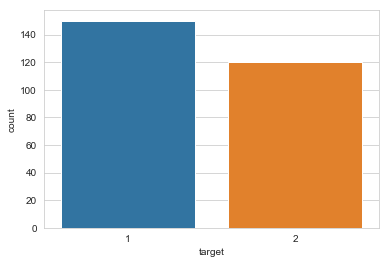

1    150
2    120
Name: target, dtype: int64


In [219]:
# Determining Target count (our target variable is represented by a binary variable - 1: HEART DISEASE ABSENT; 2: HEART DISEASE PRESENT)
sns.countplot(x="target", data=data) ## Visualizing using a histogram
plt.show()
print(data.target.value_counts()) ## Printing the count

#### Finding #2: The majority of data population falls in the range of 40-65.

Although age did not have a high correlation coefficient (from our correlation table), we wanted to dive deeper on this specific variable as our initial hypothesis was rooted in the idea that old age drives higher rates of heart disease.

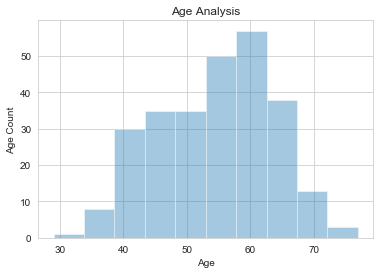

Min Age : 29.0
Max Age : 77.0
Mean Age : 54.43333333333333


In [220]:
# Visualizing the Age distribution of our dataset
sns.distplot(data['age'], bins=10, kde=False) ## histogram with 10 bins and kde=false means NOT plotting a gaussian kernel density estimate
plt.xlabel('Age') ## Horizontal Axis Label
plt.ylabel('Age Count') ## Vertical Axis Label
plt.title('Age Analysis') ## Plot Title
plt.show()

## Printing the minimum, maximum, and mean age
minage=min(data.age)
maxage=max(data.age)
meanage=data.age.mean()
print('Min Age :',minage)
print('Max Age :',maxage)
print('Mean Age :',meanage)

#### Finding #3: Approximately two-thirds of the data population are male.

It seems like this dataset is skewed much more heavily towards males.

Percentage of males: 67.778
Percentage of females: 32.222


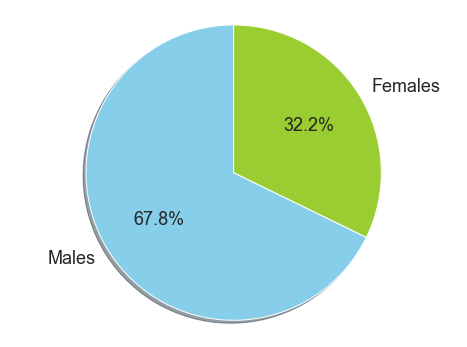

In [221]:
# Printing percentages of males and females
total = len(data["sex"])
males = data["sex"].sum() ## Number of males
females = len(data["sex"]) - males ## Number of females = Total number of sexes - Number of Males
print("Percentage of males:", round(males/total*100, 3)) ## the value 3 refers to 3 decimal places
print("Percentage of females:", round(females/total*100, 3))

# Plotting on a piechart
plt.figure(figsize=(8,6)) ##figsize is the size used to plot the piechart
plt.pie([males,females], labels=['Males', 'Females'], colors=['skyblue', 'yellowgreen'],autopct='%1.1f%%', textprops={'fontsize': 18}, shadow=True, startangle=90)
plt.axis('equal')
plt.show()

#### Finding #4: Not a huge disparity (count of heart disease) in males compared to females.

Text(0.5, 0, 'Sex')

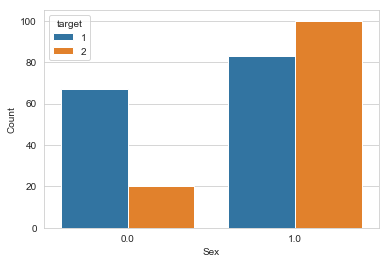

In [222]:
# Visualizing the distribution of heart disease by sex using a histogram (0: Females; 1: Males)
sex_graph = sns.countplot(data["sex"], hue=data["target"])
sex_graph.set_ylabel("Count")
sex_graph.set_xlabel("Sex")

#### Finding #5: Majority of our data/sample population has Type 4 (ie. asymptomatic) chest pain type.

Text(0, 0.5, 'Count')

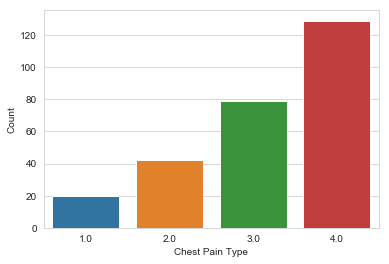

In [223]:
## Visualizing distribution of chest pain types using a histogram (4 types of chest pain type in dataset)
cp_graph = sns.countplot(data["chest_pain_type"])
cp_graph.set_xlabel("Chest Pain Type")
cp_graph.set_ylabel("Count")

#### Finding #6: Majority of our data/sample population has a Thalassemia value of 3 (ie. normal).

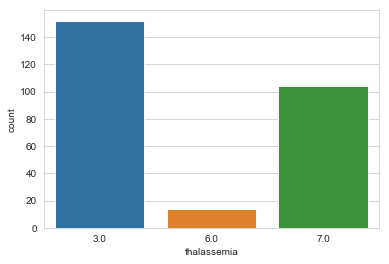

3.0    152
7.0    104
6.0     14
Name: thalassemia, dtype: int64


In [224]:
# There are 3 types of thalassemia - 3: normal; 6: fixed defect; 7: reversable defect
sns.countplot(data.thalassemia) ## Plotting using a histogram
plt.show()
print(data.thalassemia.value_counts()) ## Printing the actual count for each type of Thalassemia

#### Observations...
- Looking at the correlation table that we have generated earlier on, thalassemia was the greatest predictor of heart disease.
- Remember that there were 150 patients that DID NOT HAVE HEART DISEASE in our dataset. Compare that with the 152 patients whose thalassemia is Normal.
- The question that we have is if there is a meaningful overlap in these two numbers.
- We can answer this question by finding out the number of people who do not have heart disease and have a normal thalessemia (ie. thalessemia value=3). It turns out: 119 out of 152 people with normal thalessemia DO NOT HAVE heart disease, supporting the high correlation in our correlation matrix. However, due to the small sample size that we have, we understand that this is not indicative of the real population. 

<i><u>Definition Taken from MedlinePlus, a Medical Encyclopedia:</u></i> 
- Thalassemia is a blood disorder passed down through families (inherited) in which the body makes an abnormal form or inadequate amount of hemoglobin. 
- Hemoglobin is the protein in red blood cells that carries oxygen. The disorder results in large numbers of red blood cells being destroyed, which leads to anemia.

## Step 3 - Data Preparation <a id='S3'></a></br><a href='#C'><font size=2><i>(Back to Contents) ↑</i></font></a>
### <u>Feature Selection</u><a id='FS'></a>

In [225]:
# Defining X and y variables for feature selection
X = data.drop(["target"], axis=1)
y = data["target"]

#### Feature Selection Method 1: Univariate Selection
- To select those features that have the strongest relationship with our target variable.

In [226]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                      Specs       Score
7            max_heart_rate  168.929831
11        num_major_vessels   74.122652
12              thalassemia   59.463091
9             st_depression   58.697286
4                      chol   40.093093
8   exercise_induced_angina   31.822472
0                       age   18.485273
3            blood_pressure   15.775632
2           chest_pain_type   13.330455
6                  rest_ecg    8.688587


### Top 4 features at a glance...
<img src="http://charlestay.com/animation1.gif" width="50%">

#### Feature Selection Method 2: Feature Importance
- Gives a score for each feature, ,ie. higher score has more importance or relevance to output.
- Feature importance is an inbuilt class that comes with Tree Based Classifiers.

[0.07060451 0.04566587 0.10004963 0.06679752 0.06694051 0.01921091
 0.0367057  0.08525691 0.07433716 0.08223694 0.05664205 0.1211162
 0.1744361 ]


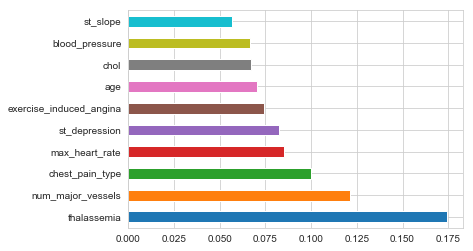

In [227]:
## Feature importance using ExtraTreesClassifier where n_estimators, ie. number of trees, =100
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X,y)
print(model.feature_importances_)  #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Univariate Selection, Feature Importance, as well as the Correlation Matrix (with Heatmap) that we have generated earlier on are three popular Feature Selection Techniques. All three techniques depicted at least 4 similar features, out of the top 5 features in each technique. 

We will explore Feature Selection in greater depth as we try to improve the results of our weakest model (ie. Support Vector Machine); and it proved to be a major success as you will see later on!

### <u>Feature Engineering</u><a id='FE'></a>
#### Converting Categorical Data Type to Objects

In [228]:
## Converting selected data types into 'object' for one hot encoding - selected data are categorical data types that are polynomial in nature
data['sex'] = data['sex'].astype('object')
data['chest_pain_type'] = data['chest_pain_type'].astype('object')
data['blood_sugar'] = data['blood_sugar'].astype('object')
data['rest_ecg'] = data['rest_ecg'].astype('object')
data['exercise_induced_angina'] = data['exercise_induced_angina'].astype('object')
data['st_slope'] = data['st_slope'].astype('object')
data['num_major_vessels'] = data['num_major_vessels'].astype('object')
data['thalassemia'] = data['thalassemia'].astype('object')

#### Generating Dummy Variables

In [229]:
## Applying one-hot encode categorical features
data = pd.get_dummies(data)
data.head(2)

,age,blood_pressure,chol,max_heart_rate,st_depression,target,sex_0.0,sex_1.0,chest_pain_type_1.0,chest_pain_type_2.0,...,st_slope_1.0,st_slope_2.0,st_slope_3.0,num_major_vessels_0.0,num_major_vessels_1.0,num_major_vessels_2.0,num_major_vessels_3.0,thalassemia_3.0,thalassemia_6.0,thalassemia_7.0
0,70.0,130.0,322.0,109.0,2.4,2,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
1,67.0,115.0,564.0,160.0,1.6,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [230]:
## Printing the shape of our data
print(data.shape[0], "x", data.shape[1])

270 x 29


In [231]:
# Defining X and y variables for ML Algorithm (now that we have generated the dummy variables)
X = data.drop(["target"], axis=1)
y = data["target"]

#### <b>***Observation:</b> Performance for all 7 classification models that we have <u><font color="orange">improved</font></u> by 1-5% WITH <u>FEATURE ENGINEERING!</u>

## Step 4 - Classification Models / Machine Learning Algorithms <a id='S4'></a></br><a href='#C'><font size=2><i>(Back to Contents) ↑</i></font></a>

Since the problem of predicting heart disease is a classification problem, we ran our dataset across the most popular classification algorithms. Here is a list, feel free to click on the links to navigate to desired sections.

[K-Nearest Neigbors (KNN)](#KNN)</br>
[Logistic Regression](#LR)</br>
[Gradient Boosting](#GB)</br>
[Support Vector Machine (SVM)](#SVM)</br>
[Decision Tree](#DT)</br>
[Random Forest](#RF)</br>
[Naive Bayes](#NB)

Before we dive in, we would like to explain the two most commonly-used functions in this section:
- "scoring=" : scoring method of our model (possible values include: accuracy, precision, recall, f1 score)
- "cv=" : number of folds in cross validation technique

### <u>K-Nearest Neighbors (KNN)</u><a id='KNN'></a>

In [232]:
# We used an industry practice of a 10-fold cross-validation with k=10 (the n_neighbors hyperparameter)
knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') #cv is the cross-validation parameter
print(scores.mean()) # average accuracy used for an estimate of out-of-sample accuracy

0.6666666666666667


Text(0, 0.5, 'Accuracy Score')

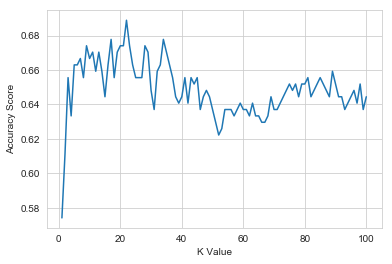

In [233]:
# Now, let's iterate through potential values of K to find an optimal value for our KNN model and to confirm if k=10 was a good value
k_range = range(1,101)
models = []
for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors=k)
    k_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    models.append(k_scores.mean())
    
# Let's plot the k values to see more quickly what k value generates the highest accuracy score
plt.plot(k_range, models)
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')

In [234]:
# From our work above (identifying the peak) we know the best value to be 22, plugging that in, we get an accuracy of 0.689 
knn = KNeighborsClassifier(n_neighbors=22)
knn_scores_accuracy = (cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())
print("accuracy:", knn_scores_accuracy.mean())

accuracy: 0.6888888888888889


True enough, k = 22 produced the highest accuracy score.

In [235]:
# With k=22, let's take a look at the precision, recall, and f1 performances.
knn_predictions = cross_val_predict(knn, X, y, cv=10)
print(confusion_matrix(y, knn_predictions))
knn_scores_precision = (cross_val_score(knn, X, y, cv=10, scoring='precision').mean())
knn_scores_recall = (cross_val_score(knn, X, y, cv=10, scoring='recall').mean())
knn_scores_f1 = (cross_val_score(knn, X, y, cv=10, scoring='f1').mean())
print("precision:", knn_scores_precision.mean())
print("recall:", knn_scores_recall.mean())
print("f1 score:", knn_scores_f1.mean())

[[122  28]
 [ 56  64]]
precision: 0.6843567251461988
recall: 0.8133333333333332
f1 score: 0.7427577482605946


### <u>Logistic Regression</u><a id='LR'></a>

In [236]:
# Logistic Regression with a 10-fold cross validation
## We tried other cv values which generated similar results but cv=10 produced a higher precision
lr_model = LogisticRegression(solver="liblinear")
lr_predictions = cross_val_predict(lr_model, X, y, cv=10)
print(confusion_matrix(y, lr_predictions))
lr_scores_recall = cross_val_score(lr_model, X, y, scoring="recall", cv=10)
lr_scores_accuracy = cross_val_score(lr_model, X, y, scoring="accuracy", cv=10)
lr_scores_f1 = (cross_val_score(lr_model, X, y, scoring='f1', cv=10).mean())
lr_scores_precision = (cross_val_score(lr_model, X, y, scoring='precision', cv=10).mean())
print("accuracy:", lr_scores_accuracy.mean())
print("precision:", lr_scores_precision.mean())
print("recall:", lr_scores_recall.mean())
print("f1 score:", lr_scores_f1.mean())

[[136  14]
 [ 23  97]]
accuracy: 0.8629629629629629
precision: 0.8635236989532654
recall: 0.9066666666666666
f1 score: 0.8803428500252586


### <u>Gradient Boosting</u><a id='GB'></a>
Gradient Boosting (and variations of it such as eXtreme Gradient Boosting, XGBoost) is widely used by Data Scientists and in Kaggle competitions, with some sources stating that it is the <a href="https://www.kdnuggets.com/2017/10/xgboost-top-machine-learning-method-kaggle-explained.html">top machine learning algorithm on Kaggle" (Reinstein 2017)</a>.

Gradient Boosting (GB) resembles Random Forest (RF), one key difference is that GB uses regression tree while RF uses decision tree.

In [237]:
# Gradient Boosting Classifier
## exponential loss, learning rate of 0.03 (ie. this shrinks the contribution of each tree by 0.03)
## 75 (number of) boosting stages to perform (GB is fairly robust to over-fitting; a large number usually results in better performance)
## Maximum depth of 6 (the maximum depth limits the number of nodes in the tree)

gb_model = GradientBoostingClassifier(loss='exponential', learning_rate=0.03, n_estimators=75 , max_depth=6)
gb_predictions = cross_val_predict(gb_model, X, y, cv=5)
print(confusion_matrix(y, gb_predictions))
gb_scores_accuracy = cross_val_score(gb_model, X, y, scoring="accuracy", cv=10)
gb_scores_precision = cross_val_score(gb_model, X, y, scoring="precision", cv=10)
gb_scores_recall = cross_val_score(gb_model, X, y, scoring="recall", cv=10)
gb_scores_f1 = cross_val_score(gb_model, X, y, scoring="f1", cv=10)
print("accuracy:", gb_scores_accuracy.mean())
print("precision:", gb_scores_precision.mean())
print("recall:", gb_scores_recall.mean())
print("f1 score:", gb_scores_f1.mean())

[[128  22]
 [ 39  81]]
accuracy: 0.7555555555555555
precision: 0.7831184201075843
recall: 0.7933333333333333
f1 score: 0.7786260635758444


### <u>Support Vector Machine (SVM)</u><a id='SVM'></a>

In [238]:
## Support Vector Machine - SVM seems to provide the best recall result but relatively low accuracy (compared to our other models)
svc_model = SVC(gamma="auto")
svc_predictions = cross_val_predict(svc_model, X, y, cv=5)
print(confusion_matrix(y, svc_predictions))
svc_scores_recall = cross_val_score(svc_model, X, y, scoring="recall", cv=10)
svc_scores_accuracy = cross_val_score(svc_model, X, y, scoring="accuracy", cv=10)
svc_scores_f1 = (cross_val_score(svc_model, X, y, scoring='f1', cv=10).mean())
svc_scores_precision = (cross_val_score(svc_model, X, y, scoring='precision', cv=10).mean())
print("accuracy:", svc_scores_accuracy.mean())
print("precision:", svc_scores_precision.mean())
print("recall:", svc_scores_recall.mean())
print("f1 score:", svc_scores_f1.mean())

[[147   3]
 [112   8]]
accuracy: 0.5740740740740741
precision: 0.5678632478632478
recall: 0.9800000000000001
f1 score: 0.7189895470383274


In order to improve accuracy, we feature engineered our SVM by applying featuring scaling on age, blood pressure, cholesterol, maximum heart rate and st depression.

In [239]:
# Feature Scaling on SVM
## Applying MinMaxScaler in sklearn.
X["age"] = X["age"].map(lambda x: (x - X["age"].min()) / (X["age"].max() - X["age"].min()))
X["blood_pressure"] = X["blood_pressure"].map(lambda x: (x - X["blood_pressure"].min()) / (X["blood_pressure"].max() - X["blood_pressure"].min()))
X["chol"] = X["chol"].map(lambda x: (x - X["chol"].min()) / (X["chol"].max() - X["chol"].min()))
X["max_heart_rate"] = X["max_heart_rate"].map(lambda x: (x - X["max_heart_rate"].min()) / (X["max_heart_rate"].max() - X["max_heart_rate"].min()))
X["st_depression"] = X["st_depression"].map(lambda x: (x - X["st_depression"].min()) / (X["st_depression"].max() - X["st_depression"].min()))

In [240]:
# Cross Validation of 5-folds (produced better results than 10-folds)
svc_model = SVC(gamma="auto")
svc_predictions = cross_val_predict(svc_model, X, y, cv=5)
print(confusion_matrix(y, svc_predictions))
svc_scores_recall = cross_val_score(svc_model, X, y, scoring="recall", cv=5)
svc_scores_accuracy = cross_val_score(svc_model, X, y, scoring="accuracy", cv=5)
svc_scores_f1 = cross_val_score(svc_model, X, y, scoring="f1", cv=5)
svc_scores_precision = cross_val_score(svc_model, X, y, scoring="precision", cv=5)
print("accuracy:", svc_scores_accuracy.mean())
print("precision:", svc_scores_precision.mean())
print("recall", svc_scores_recall.mean())
print("f1 score", svc_scores_f1.mean())

[[135  15]
 [ 27  93]]
accuracy: 0.8444444444444444
precision: 0.8343550543384509
recall 0.9
f1 score 0.8657206126765884


<b>With feature scaling, we managed to improve accuracy of our SVM model from 57.4% to 84.4%!</b></br>
This motivated us to try other methods of data manipulation (ie. feature selection):

In [241]:
# Feature Selection on SVM using sklearn.feature_selection.SelectPercentile and applying chi2 (Chi-squared stats)
best_recall = 0
best_accuracy = 0
for n in range(1, 101): ## range 1-100th percentile for chi-square
    X_new = SelectPercentile(chi2, percentile=n).fit_transform(X, y)

    svc_model = SVC(gamma="auto")
    svc_predictions = cross_val_predict(svc_model, X_new, y, cv=10) ## CV of 10
    svc_scores_recall = cross_val_score(svc_model, X_new, y, scoring="recall", cv=10)
    svc_scores_accuracy = cross_val_score(svc_model, X_new, y, scoring="accuracy", cv=10)
    
    if svc_scores_recall.mean() > best_recall: ## runs through all recalls greater than the mean
        best_recall = svc_scores_recall.mean()
        print(confusion_matrix(y, svc_predictions))
        print("the best percentage so far:", n)
        print("the best recall so far", svc_scores_recall.mean(), "\n")
        
    if svc_scores_accuracy.mean() > best_accuracy: ## runs through all accuracies greater than the mean
        best_accuracy = svc_scores_accuracy.mean()
        print(confusion_matrix(y, svc_predictions))
        print("the best percentage so far:", n)
        print("the best accuracy so far", svc_scores_accuracy.mean(), "\n")

[[125  25]
 [ 41  79]]
the best percentage so far: 1
the best recall so far 0.8333333333333333 

[[125  25]
 [ 41  79]]
the best percentage so far: 1
the best accuracy so far 0.7555555555555555 

[[131  19]
 [ 53  67]]
the best percentage so far: 4
the best recall so far 0.8733333333333334 

[[125  25]
 [ 37  83]]
the best percentage so far: 8
the best accuracy so far 0.7703703703703704 

[[134  16]
 [ 26  94]]
the best percentage so far: 15
the best recall so far 0.8933333333333333 

[[134  16]
 [ 26  94]]
the best percentage so far: 15
the best accuracy so far 0.8444444444444444 

[[134  16]
 [ 25  95]]
the best percentage so far: 19
the best accuracy so far 0.8481481481481481 

[[135  15]
 [ 22  98]]
the best percentage so far: 23
the best recall so far 0.9 

[[135  15]
 [ 22  98]]
the best percentage so far: 23
the best accuracy so far 0.8629629629629628 

[[136  14]
 [ 26  94]]
the best percentage so far: 30
the best recall so far 0.9066666666666668 

[[137  13]
 [ 23  97]]
the be

In [242]:
## Accuracy is highest at the 63rd Percentile.

In [243]:
X_new = SelectPercentile(chi2, percentile=63).fit_transform(X, y)        
svc_model = SVC(gamma="auto")
svc_predictions = cross_val_predict(svc_model, X_new, y, cv=10)
print(confusion_matrix(y, svc_predictions))
svc_scores_recall = cross_val_score(svc_model, X_new, y, scoring="recall", cv=10)
svc_scores_accuracy = cross_val_score(svc_model, X_new, y, scoring="accuracy", cv=10)
svc_scores_precision = cross_val_score(svc_model, X_new, y, scoring="precision", cv=10)
svc_scores_f1 = cross_val_score(svc_model, X_new, y, scoring="f1", cv=10)
print("Highest accuracy score: ", svc_scores_accuracy.mean(), "\n")
print("Corresponding precision: ", svc_scores_precision.mean(), "\n")
print("Corresponding recall: ", svc_scores_recall.mean(), "\n")
print("Corresponding f1 score: ", svc_scores_f1.mean(), "\n")

[[137  13]
 [ 23  97]]
Highest accuracy score:  0.8666666666666666 

Corresponding precision:  0.8629147245942912 

Corresponding recall:  0.9133333333333334 

Corresponding f1 score:  0.8836502392948281 



In [244]:
## Print number of old features used
print("Old number of features used:",X.shape[1])
## Print number of new features used
print("New number of features used:",X_new.shape[1])

Old number of features used: 28
New number of features used: 18


#### Using feature selection, we reduced the number of (irrelevant) features and now use only 18 of the original 28 features. These are the 18 features with the highest correlation. This greatly improved the accuracy score of our Support Vector Machine Model.

### <u>Decision Tree</u><a id='DT'></a>

In [245]:
# test_size=0.3 splits our data into a 70/30 split which means that we are going to train our data with 70% of the data 
# and then we are going to see how well we can predict our classification models off of 30% of the remaining data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [246]:
# Decision Tree Classifier/Algorithm
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [247]:
y_pred = DT.predict(X_test)
print("accuracy: ", DT.score(X_test, y_test))

accuracy:  0.7530864197530864


In [248]:
# Printing other evaluation metrics, such as precision, recall, f1-score
## Reference - Target 1: Heart Disease Absent; Target 2: Heart Disease Present
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.72      0.76      0.74        38
           2       0.78      0.74      0.76        43

   micro avg       0.75      0.75      0.75        81
   macro avg       0.75      0.75      0.75        81
weighted avg       0.75      0.75      0.75        81



In [249]:
# We were interested in seeing how changing our train-test split ratio to 80-20 affects accuracy (ie. feeding more data to our training set)
X=data.drop('target',axis=1)
Y=data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [250]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [251]:
y_pred = DT.predict(X_test)
print("accuracy ", DT.score(X_test, y_test))

accuracy  0.8148148148148148


In [252]:
# Printing other evaluation metrics, such as precision, recall, f1-score
## Reference - Target 1: Heart Disease Absent; Target 2: Heart Disease Present
report = classification_report(y_test,y_pred)
print(report)

# Definining dtcm = decision tree confusion matrix (to be used in Section 5)
dtcm = confusion_matrix(y_pred, y_test)

              precision    recall  f1-score   support

           1       0.90      0.69      0.78        26
           2       0.76      0.93      0.84        28

   micro avg       0.81      0.81      0.81        54
   macro avg       0.83      0.81      0.81        54
weighted avg       0.83      0.81      0.81        54



#### Observation: A 80-20 split generated an overall better performance than 70-30 for our Decision Tree.

### <u>Random Forest</u><a id='RF'></a>

In [253]:
# Random Forest Model (100 trees)
RF = RandomForestClassifier(n_estimators=100)

In [254]:
# Using previously-defined 80-20 split
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [255]:
y_pred = RF.predict(X_test)
print("accuracy: ", RF.score(X_test, y_test))

accuracy:  0.8888888888888888


In [256]:
# Printing other evaluation metrics, such as precision, recall, f1-score
## Reference - Target 1: Heart Disease Absent; Target 2: Heart Disease Present
report = classification_report(y_test,y_pred)
print(report)
# Definining rfcm = random forest confusion matrix (to be used in Section 5)
rfcm = confusion_matrix(y_pred, y_test)

              precision    recall  f1-score   support

           1       0.88      0.88      0.88        26
           2       0.89      0.89      0.89        28

   micro avg       0.89      0.89      0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54



In [257]:
## Random Forest with Cross Validation instead of 70-30 train-test split
rf_model = RandomForestClassifier(n_estimators=100)
rf_predictions = cross_val_predict(rf_model, X, y, cv=10)
print(confusion_matrix(y, rf_predictions))
rf_scores_recall = cross_val_score(rf_model, X, y, scoring="recall", cv=10)
rf_scores_accuracy = cross_val_score(rf_model, X, y, scoring="accuracy", cv=10)
rf_scores_precision = cross_val_score(rf_model, X, y, scoring="precision", cv=10)
rf_scores_f1 = cross_val_score(rf_model, X, y, scoring="f1", cv=10)
print("accuracy:", rf_scores_accuracy.mean())
print("precision:", rf_scores_precision.mean())
print("recall:", rf_scores_recall.mean())
print("f1 score:", rf_scores_f1.mean())

[[133  17]
 [ 27  93]]
accuracy: 0.8296296296296296
precision: 0.8393101343101345
recall: 0.8800000000000001
f1 score: 0.8507727922800224


<b>Observation: Random Forest with Cross Validation of 10 folds yield a higher accuracy than a 80-20 split.</b>

### <u>Naive Bayes</u><a id='NB'></a>

In [258]:
# Performing Naive Bayes
nb_model = GaussianNB()

In [259]:
# Naive Bayes with 70-30 train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [260]:
# Fitting training data set into classifier
nb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [261]:
# Predicting the model
y_pred = nb_model.predict(X_test)

In [262]:
# Creating confusion matrix
bayes_cm = confusion_matrix(y_test,y_pred)

In [263]:
# Compare and test different score methods for Naive Bayes 70-30 Split
nb_split_precision = metrics.precision_score(y_test,y_pred)
nb_split_recall = metrics.recall_score(y_test,y_pred)
nb_split_accuracy = metrics.accuracy_score(y_test, y_pred)
nb_split_f1_score = metrics.f1_score(y_test,y_pred)
nb_split_cm = confusion_matrix(y_test, y_pred)
print(nb_split_cm)
print("accuracy: ", nb_split_accuracy)
print("precision: ", nb_split_precision)
print("recall: ", nb_split_recall)
print("f1_score: ", nb_split_f1_score)      

[[35  3]
 [ 9 34]]
accuracy:  0.8518518518518519
precision:  0.7954545454545454
recall:  0.9210526315789473
f1_score:  0.8536585365853658


In [264]:
# Instead of a 70-30 split, we wanted to investigate the effect of an 80-20 split 
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.20, random_state=10)
nb_model1 = GaussianNB()
nb_model1.fit(X1_train, y1_train)
y1_pred = nb_model.predict(X1_test)
bayes_cm1 = confusion_matrix(y1_test,y1_pred)

In [265]:
# Compare and test different score methods for Naive Bayes 80-20 Split
nb_split_precision = metrics.precision_score(y1_test,y1_pred)
nb_split_recall = metrics.recall_score(y1_test,y1_pred)
nb_split_accuracy = metrics.accuracy_score(y1_test, y1_pred)
nb_split_f1_score = metrics.f1_score(y1_test,y1_pred)
nb_split_cm = confusion_matrix(y1_test, y1_pred)
print(nb_split_cm)
print("accuracy: ", nb_split_accuracy)
print("precision: ", nb_split_precision)
print("recall: ", nb_split_recall)
print("f1_score: ", nb_split_f1_score)   

[[24  2]
 [ 4 24]]
accuracy:  0.8888888888888888
precision:  0.8571428571428571
recall:  0.9230769230769231
f1_score:  0.888888888888889


In [266]:
## Naive Bayes with Cross Validation of 10-folds
nbcv_model = GaussianNB()
nbcv_predictions = cross_val_predict(nbcv_model, X, y, cv=10)
print(confusion_matrix(y, nbcv_predictions))
nbcv_scores_accuracy = cross_val_score(nb_model, X, y, scoring="accuracy", cv=10)
nbcv_scores_precision = cross_val_score(nb_model, X, y, scoring="precision", cv=10)
nbcv_scores_recall = cross_val_score(nb_model, X, y, scoring="recall", cv=10)
nbcv_scores_f1 = cross_val_score(nb_model, X, y, scoring="f1", cv=10)
print("accuracy: ", nbcv_scores_accuracy.mean())
print("precision: ", nbcv_scores_precision.mean())
print("recall: ", nbcv_scores_recall.mean())
print("f1 score: ", nbcv_scores_f1.mean())

[[127  23]
 [ 26  94]]
accuracy:  0.8185185185185185
precision:  0.8431922188578534
recall:  0.8466666666666667
f1 score:  0.8393511441229494


<b>It seems like Naive Bayes with an 80-20 train-test split produced the best accuracy score compared to 70-30 split and cross validation.

## Step 5 - Evaluation <a id='S5'></a></br><a href='#C'><font size=2><i>(Back to Contents) ↑</i></font></a>

### <u>Accuracy, Precision, Recall, F1 Score at A Glance</u>
We created a dashboard (using Tableau) with the performance scores from our best models.</br>
- It seems like Naiive Bayes with an 80-20 split is our leading contender in Accuracy (88.9%), Recall (92.3%) and F1 Score (88.9%).
- Logistic Regression with a 5-fold cross validation performs best in terms of Precision (86.4%).

<img src="http://charlestay.com/7ModelsDB.jpg">

### <u>Confusion Matrices</u>

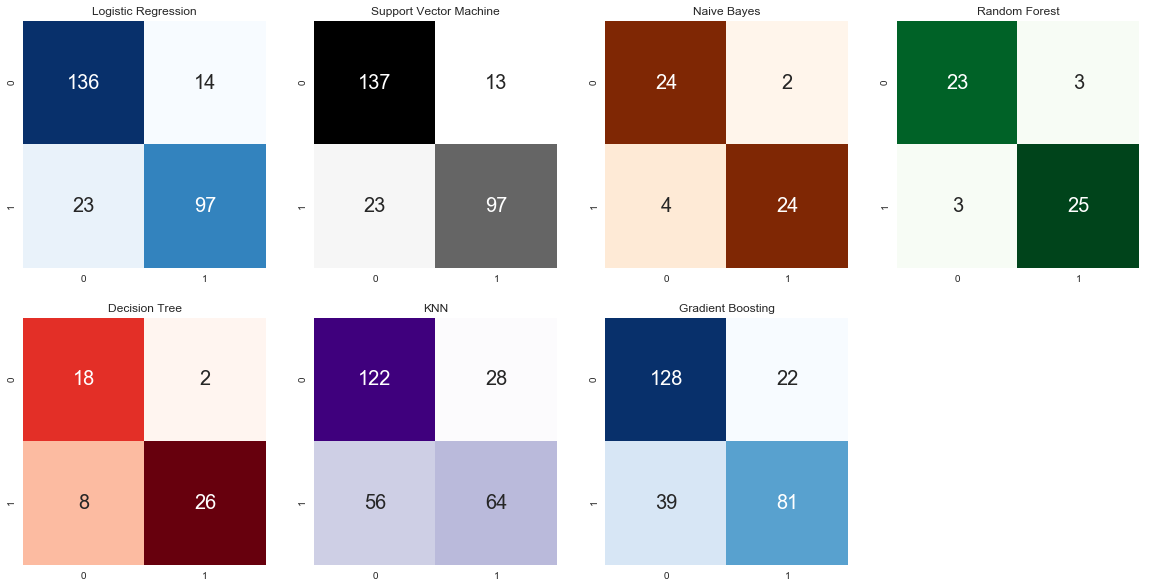

In [267]:
# Generating Confusion Matrices of the 6 Models that we have
## Defining the different confusion matrices (some have been defined earlier on and thus missing in this list)
lrcm = confusion_matrix(y, lr_predictions)
svmcm = confusion_matrix(y, svc_predictions)
nbcm = confusion_matrix(y1_test, y1_pred)
knncm = confusion_matrix(y, knn_predictions)
gbcm = confusion_matrix(y, gb_predictions)
## Defining size of visualization
plt.figure(figsize=(20,10))
## Plotting with 2 rows and 4 columns, the last value refers to the order it appears in.
plt.subplot(2,4,1)
plt.title("Logistic Regression")
sns.heatmap(lrcm,annot=True,cmap="Blues",fmt="d",cbar=False,annot_kws={"size": 20}) ## annot_kws defines the font size of values.
plt.subplot(2,4,2)
plt.title("Support Vector Machine")
sns.heatmap(svmcm,annot=True,cmap="Greys",fmt="d",cbar=False,annot_kws={"size": 20})
plt.subplot(2,4,3)
plt.title("Naive Bayes")
sns.heatmap(nbcm,annot=True,cmap="Oranges",fmt="d",cbar=False,annot_kws={"size": 20})
plt.subplot(2,4,4)
plt.title("Random Forest")
sns.heatmap(rfcm,annot=True,cmap="Greens",fmt="d",cbar=False,annot_kws={"size": 20})
plt.subplot(2,4,5)
plt.title("Decision Tree")
sns.heatmap(dtcm,annot=True,cmap="Reds",fmt="d",cbar=False,annot_kws={"size": 20})
plt.subplot(2,4,6)
plt.title("KNN")
sns.heatmap(knncm,annot=True,cmap="Purples",fmt="d",cbar=False,annot_kws={"size": 20})
plt.subplot(2,4,7)
plt.title("Gradient Boosting")
sns.heatmap(gbcm,annot=True,cmap="Blues",fmt="d",cbar=False,annot_kws={"size": 20})
plt.show()